In [1]:
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
from fastai.text import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels

In [3]:
%matplotlib inline 

In [4]:
df = pd.read_csv('/content/IMDB Dataset.csv')
pd.set_option('display.max_colwidth', -1)
df = df.reindex(np.random.permutation(df.index)) # this will allow us to take a look at some random rows of the dataset, rather than the first five
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


review sentiment
40043  Office work, especially in this era of computers, multi-functional copy machines, e-mail, voice mail, snail mail and `temps,' is territory ripe with satirical possibilities, a vein previously tapped in such films as `Clockwatchers' and `Office Space,' and very successfully. This latest addition to the temp/humor pool, however, `Haiku Tunnel,' directed by Josh Kornbluth and Jacob Kornbluth, fails to live up to it's predecessors, and leaves the laughs somewhere outside the door, waiting for a chance to sneak in. Unfortunately for the audience, that chance never comes; so what you get is a nice try, but as the man once said, no cigar.<br /><br />\tAs the narrator/star of the film, Josh Kornbluth (playing Josh Kornbluth), points out in the opening frames (in a monologue delivered directly into the camera), this story is pure fiction, and takes place in the fictional city of `San Franc'l'isco.' It's an innovative, if not very imaginatively presented disclaimer, and not all that funny. It is, however, a harbinger of what is to follow, all of which-- like the disclaimer-- just isn't all that funny.<br /><br />\tKornbluth plays Kornbluth, an aspiring novelist who supports himself working as a `temp.' It's a job that suits him, and it gives him time to slip in some work on his novel from time to time. But when he goes to work for a lawyer, Bob Shelby (Warren Keith), he does too good a job on the first day, and Shelby dispatches head secretary Marlina D'Amore (Helen Shumaker) to Kornbluth to persuade him to go `perm.' The thought of working full time for the same company, though, initially strikes fear in the heart of Kornbluth, but he caves in and signs on for the position. He's nervous about it, but at least now the other secretaries acknowledge his presence (which, of course, they would never do with a temp), and if things get too rough, he has seventeen important letters he's typed up-- that now just have to be mailed out-- to fall back on (he's been holding them back because the mailing is the easy part, and he needs that `something easy to do' in reserve, in case it all gets to be too much for him). These are `important' letters, however, and by the end of the week, Kornbluth still has them in reserve, on his desk. And it doesn't take a genius to figure out that when Shelby finds out about it, Kornbluth's days as the fair-haired boy are going to be over. And quick.<br /><br />\tThe Brothers Kornbluth, who not only directed, but along with John Bellucci also wrote the screenplay for this film, should have taken a page out of the Ben Stiller Book of Comedy, where it says `If you play it straight, they will laugh.' But, they didn't, and the audience won't. Because in comedy, even looking at it as objectively as possible, when the main character (as well as most of the supporting characters, in this case) `Plays' funny-- as in, he `knows' he's being funny-- he never is. And that's exactly what Kornbluth does here; so rather than being `funny,' he comes across as insincere and pretentious, a grievous error in judgment on the part of the Kornbluths, because by allowing it, they sabotaged their own movie. <br /><br />\tIn trying to discern exactly why this movie doesn't work, it comes down to two basic reasons: The directing, which-- if not necessarily `bad'-- is at least careless; and secondly, the performances, beginning with that of Josh Kornbluth. Quite simply, Kornbluth just seems too impressed with himself to be effective here. Unlike Stiller, or even Steve Martin-- both of whom use self-deprecating humor very effectively-- Kornbluth apparently has an ego that simply will not allow putting himself in that light; he seems to have a need to let his audience know that he, the real Kornbluth, is in reality much more clever than Kornbluth the character. And being unable to get past that does him in, as well as the film. Rather than give the millions of office workers who may see this film someone to whom they can

In [5]:
# (tweets, categories) or (rows without header, columns)

df.shape

(50000, 2)

In [6]:
# Counting the number of tweets for each type of sentiment

df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Text(0, 0.5, 'Number of tweets')

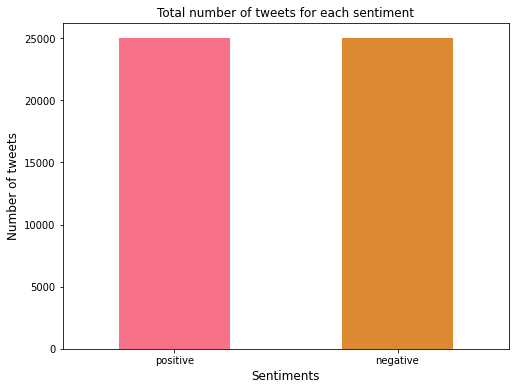

In [7]:
# Plotting the number of tweets for each type of sentiment

#bar_chart

colors = sns.color_palette("husl", 10)
pd.Series(df["sentiment"]).value_counts().plot(kind = "bar", color = colors, figsize = (8,6), rot = 0, title = "Total number of tweets for each sentiment")
plt.xlabel('Sentiments', fontsize = 12)
plt.ylabel('Number of tweets', fontsize = 12)

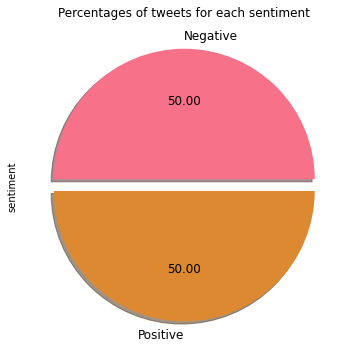

In [9]:
#pie_chart

colors = sns.color_palette("husl", 10)
pd.Series(df["sentiment"]).value_counts().plot(kind = "pie",colors = colors, labels = ["Negative", "Positive"],explode = [0.05,0.04],
          shadow = True, autopct = '%.2f', fontsize = 12, figsize = (6, 6), title = "Percentages of tweets for each sentiment")

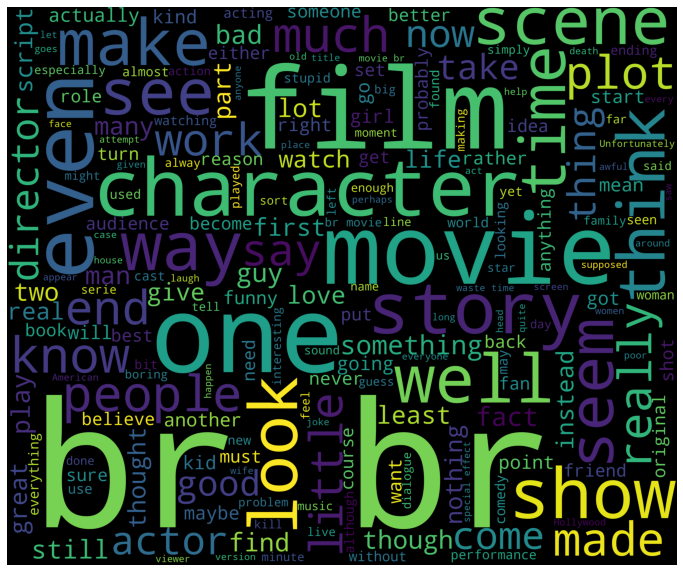

In [14]:
# Wordcloud for negative tweets

new_df = df[df['sentiment']=='negative']
words = ' '.join(new_df['review'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and word != '<br />'
                            ])
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 3000, height = 2500).generate(cleaned_word)
plt.figure(1, figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

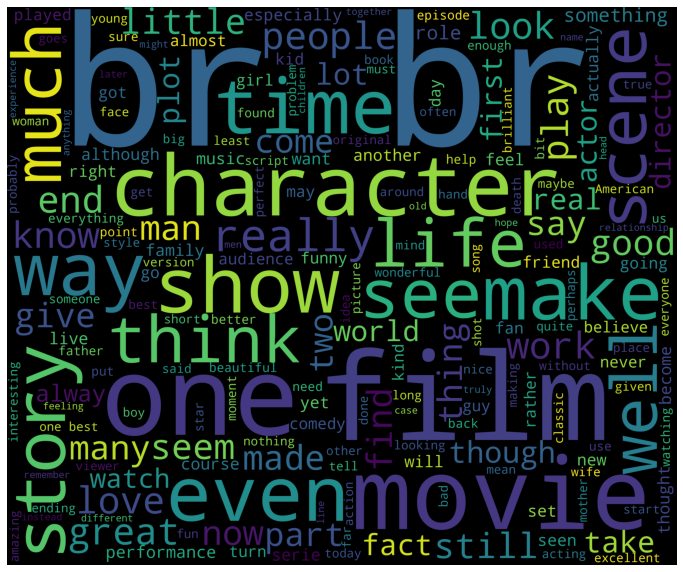

In [16]:
# Wordcloud for positive tweets

new_df = df[df['sentiment']=='positive']
words = ' '.join(new_df['review'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and word != '<br />'
                            ])
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 3000, height = 2500).generate(cleaned_word)
plt.figure(1, figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

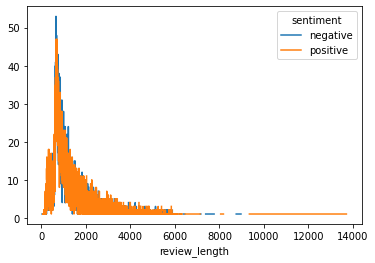

In [19]:
# Plotting the connection between the length of the tweets and the sentiments they are featuring

df['review_length'] = df['review'].apply(len)
df.groupby(['review_length', 'sentiment']).size().unstack().plot(kind = 'line', stacked = False)

In [22]:
test_percentage = 0.1
df.sort_index(inplace = True)
cutoff = int(test_percentage * df.shape[0])
df[['sentiment', 'review']][:cutoff].to_csv('/content/Reviews_filtered_test.csv', index = False, encoding = 'utf-8')
df[['sentiment', 'review']][cutoff:].to_csv('/content/Reviews_filtered_train.csv', index = False, encoding = 'utf-8')
df[['review']][cutoff:].to_csv('/content/Reviews_text_only_train.csv', index = False, encoding = 'utf-8')

In [23]:
data = TextClasDataBunch.from_csv('.', '/content/Reviews_filtered_train.csv')
data.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


In [24]:
print(data.train_ds[0][0])
print(data.train_ds[1][0])
print(data.train_ds[2][0])

xxbos i know that xxmaj guts of a xxmaj beauty and xxmaj guts of a xxmaj virgin are crap films and are hated by many but i 'm gon na put myself under the bus here and say i like 'em , especially xxmaj guts of a xxmaj beauty ( aka xxmaj entrails of a xxmaj beautiful xxmaj woman ) . xxmaj watched it the other night with some folks at the pad and i was surprised how well it actually went over . 
 
  xxmaj entrails is the type of madcap cheapo horror softcore sleaze epic that you really just do n't find too much of outside of xxmaj asia ( specifically xxmaj japan in this case ) . xxmaj it 's basically a rape / revenge flick with a reincarnated monster instead of some silly shotgun murders or a motorboat - propelled noose or even a ticked off xxmaj daddy with a chainsaw ... xxmaj that stuff 's just silly . xxmaj would n't you rather see a hermaphroditic monster with a hilarious little snake monster for a winky ? 
 
  xxup perversion xxup factor : xxmaj this movie is high in graphic , someti

In [25]:
print(data.train_ds[0][0].data[:10])
print(data.train_ds[1][0].data[:10])
print(data.train_ds[2][0].data[:10])

[   2   19  140   21    5 3413   14   13    5  921]
[    2     5  3802     5 31829    23   356    32     5  1708]
[   2    5 2625   28 1219    5 5477    5  986  844]


In [26]:
bs = 24
seed = 333

In [27]:
# Ingesting the data again, but with a 10% holdout that will be used to calibrate the language model

data_lm = (TextList.from_csv('.', '/content/Reviews_text_only_train.csv')
            .random_split_by_pct(0.1, seed = seed)
           # split randomly and keep 10% for validation
            .label_for_lm()           
           # labeling accordingly in order to create a language model
            .databunch(bs = bs))
data_lm.save('/content/data_lm.pkl')

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:217: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [28]:
# data_lm = load_data(path, 'data_lm.pkl', bs=bs)
data_lm.show_batch()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-02
Min loss divided by 10: 3.31E-03


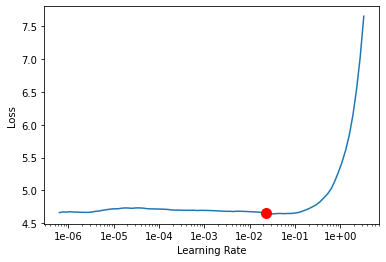

In [29]:
#Creating the language model

learn = language_model_learner(data_lm, AWD_LSTM, drop_mult = 0.3)
learn.lr_find()   # find the learning rate by running a few epochs on the model to plot loss, and then calculate the minimum gradient
learn.recorder.plot(suggestion = True)    # plot the learning rate graph
min_grad_lr = learn.recorder.min_grad_lr

In [30]:
learn.fit_one_cycle(2, min_grad_lr)   # uses large, cyclical learning rates to train models significantly quicker and with higher accuracy

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.45E-05
Min loss divided by 10: 4.37E-04


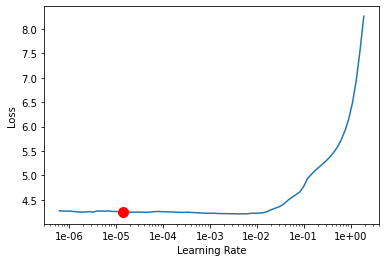

In [31]:
learn.save('fit_head')
#learn.load('fit_head')
learn.unfreeze()    # unfreezing weights 
learn.lr_find()
learn.recorder.plot(suggestion = True)

In [32]:
learn.fit_one_cycle(5, 1e-3)   # training the rest of the NN

In [33]:
learn.save('fine_tuned')
learn.save_encoder('fine_tuned_enc')

In [34]:
TEXT = "I liked "
N_WORDS = 40
N_SENTENCES = 3
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked  this movie a lot . i was n't expecting much but i was out for a good laugh . This movie had a good premise and i loved it , it really is a great film with a really
I liked  this film , but as a German , it 's not really an American film . It 's funny , it has good humor and it does n't have that . It does n't take itself
I liked  this movie . Its the best . It is a realistic portrayal of life on a high school . The characters are not so stereotypical and you wo n't forget them . It was long ,


In [36]:
data_clas = (TextList.from_csv('.', '/content/Reviews_filtered_train.csv', cols = 'review')               
             .random_split_by_pct(0.1, seed = seed)
             .label_from_df(cols = 0)
             .databunch(bs = bs))
data_clas.save('/content/data_clas.pkl')
data_clas.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:217: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [37]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (40500 items)
x: TextList
xxbos xxmaj not a movie for everyone , but this movie is in my top 10 . i am a lover of black comedy . xxmaj with a cast including xxmaj richard xxmaj dreyfus ( xxmaj vic ) , xxmaj jeff xxmaj goldblum ( xxmaj mick ) , xxmaj larry xxmaj bishop ( xxmaj nick ) and xxmaj gabriel xxmaj byrne ( xxmaj ben ' xxmaj brass xxmaj balls ' xxmaj london ) in the leads , the lines ca n't help but be dry . xxmaj the supporting cast is nearly dead center . xxmaj counting the minor flaws in the movie : xxmaj ellen xxmaj barkin 's make - up gave her face has a washed out look ; there were a couple of gimme cameos by xxmaj joey xxmaj bishop and xxmaj richard xxmaj pryor that served no purpose , and xxmaj michael xxup j. xxmaj pollard 's screen time was too short . xxmaj over all , the cast was just incredible without egos to wreck a fine script . xxmaj if you have seen xxmaj larry xxmaj bishop 's ( writer , director ) film , xxm

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.02E-03
Min loss divided by 10: 5.25E-02


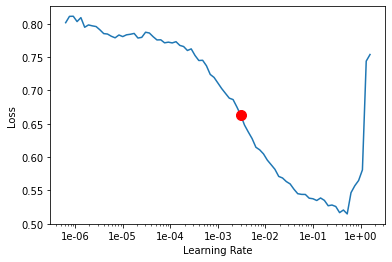

In [38]:
# find and plot the learning rate

learn.lr_find()
learn.recorder.plot(suggestion = True)
min_grad_lr = learn.recorder.min_grad_lr

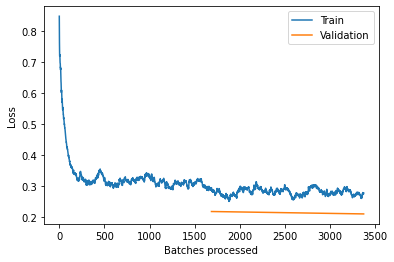

In [39]:
learn.fit_one_cycle(2, min_grad_lr)
learn.recorder.plot_losses()

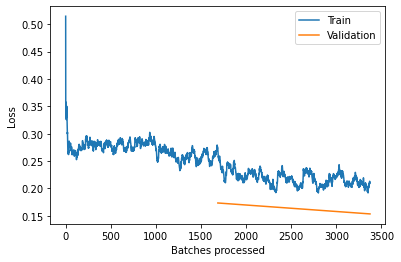

In [40]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, slice(5e-3, 2e-3), moms=(0.8,0.7))
learn.recorder.plot_losses()

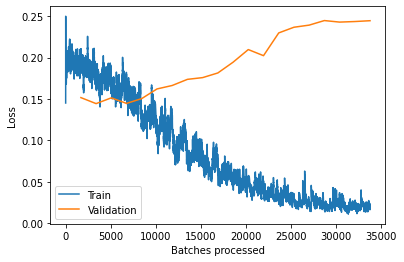

In [41]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(2e-3/100, 2e-3), moms=(0.8,0.7))
learn.recorder.plot_losses()

In [42]:
learn.predict("The plot was interesting, I enjoyed every aspect of the movie. Thrilling!")

(Category tensor(1), tensor(1), tensor([0.0102, 0.9898]))

In [43]:
learn.predict("Worst movie ever! Boring characters, really predictable. Don't watch it!")

(Category tensor(0), tensor(0), tensor([0.9967, 0.0033]))

Text(0, 0.5, 'Number of tweets')

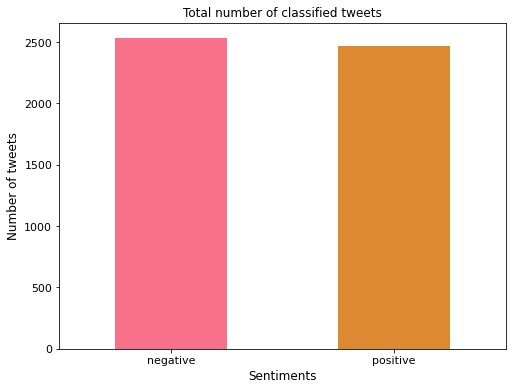

In [44]:
test_df = pd.read_csv("/content/Reviews_filtered_test.csv", encoding = "utf-8")
colors = sns.color_palette("husl", 10) 
pd.Series(test_df["sentiment"]).value_counts().plot(kind = "bar", color = colors, figsize = (8,6), fontsize = 11,rot = 0, title = "Total number of classified tweets")
plt.xlabel('Sentiments', fontsize = 12)
plt.ylabel('Number of tweets', fontsize = 12)

In [45]:
test_df['pred_sentiment'] = test_df['review'].apply(lambda row: str(learn.predict(row)[0]))
print("Test Accuracy: ", accuracy_score(test_df['sentiment'], test_df['pred_sentiment']))

Test Accuracy:  0.9494


In [46]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize = False,
                          title = None,
                          cmap = plt.cm.PuBu):
   
    # Normalization can be applied by setting 'normalize=True'
  
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation = 'nearest', cmap = cmap)
    ax.figure.colorbar(im, ax = ax)
    # We want to show all the ticks...
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           # [...] and label them with the respective list entries
           xticklabels = classes, yticklabels = classes,
           title = title,
           ylabel = 'True label',
           xlabel = 'Predicted label')

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation = 45, ha = "right",
             rotation_mode = "anchor")

    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha = "center", va = "center",
                    color = "white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

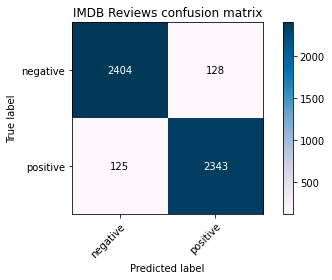

In [47]:
plot_confusion_matrix(test_df['sentiment'], test_df['pred_sentiment'], classes=['negative', 'positive'], title='IMDB Reviews confusion matrix')
plt.show()